# Proceso de ETL datos CNC

Se inicia visualizando la data etiquetada como 2012

In [14]:
import pandas as pd 

path_2012 = 'Data_CNC/d2012---copia.xlsx'
df2012 = pd.read_excel(path_2012)

Lectura de archivo de 2013

In [15]:
path_2013 = 'Data_CNC/d2013---copia.xlsx'
df2013 = pd.read_excel(path_2013)

Lectura de archivo 2016

In [16]:
path_2016 = 'Data_CNC/d2016---copia.xlsx'
df2016 = pd.read_excel(path_2016)

Lectura de archivo 2018

In [17]:
path_2018 = 'Data_CNC/d2018---copia.xlsx'
df2018 = pd.read_excel(path_2018)

Lectura de archivo 2023

In [18]:
path_2023 = 'Data_CNC/d2023---copia.xlsx'
df2023 = pd.read_excel(path_2023)

In [19]:
for i in (df2023.columns):
    print (i, df2023.loc[0,i])

ID 2023
ESTUDIO CC913901_AD_23_HOGAR
ENTREVISTADOR 27848
REGISTRO 1877
FECHAINI 2023-04-04 00:00:00
HORAINI 14:47:01
FECHAFIN 2023-04-04 00:00:00
HORAFIN 16:14:40
DURACION 5257
TELEFONO nan
EMAIL nan
ID_CONTACTO 1
ESTADO 6
IDIOMA 1
IDCOORD ggutierrez
GPSVAL 1
GPSALT 9219000244140620.0
GPSLONG 73.1366221
GPSLAT 7.1137993
GPSPRECISION 14.0
IDGUID 68A6DDD4423C4F71BA811C93CA1D061C
IDGUIDCONTACTO nan
IDGUIDREC F528C6073E4C44A9A0DE4B8935316B41
IDAPK 4.4.2142.1
IDBROWSER Chrome
IDDEVICE 6ad3714b108c5ad7
IDIP nan
IDMODE E
IDMODEL SMT285M
IDSCREEN 601;962;V
IDSO Android
IDPPI 12780000686645500
IDVERBROWSER 95
IDVERSO 5.1.1
IDVERSION 16
IDUSUARIO 63544993
TIPO_ENCUESTA 1
TIPO 3
AUX99_1 1
IDEND 1
N_ENCUESTA 764678
VERSION 16
GPSE 1
LONG_1 73.1366221
LAT_1 7.1137993
VERIFICA 1
FOTO nan
REGIONAL 5
PB1 1
ID_MANZANA 308055
ID_MANZ_AUX 308055
AUX99 1
CODDANE 68001105260308.0
POINT_X 73.1365642371
POINT_Y 7.11397987518
BAN 1.0
SECTOR 526
SECCION 3
MANZANA 8
ST_CARTOG 3
CIU 8.0
CONTACTO 1
ESTRATO_BASE n

In [21]:
# # Normalizar nombres de columnas
# df2016.columns = df2016.columns.str.lower().str.replace(' ', '_')
# df2018.columns = df2018.columns.str.lower().str.replace(' ', '_')
# df2023.columns = df2023.columns.str.lower().str.replace(' ', '_')

In [22]:
# # Identificar columnas comunes y únicas
# common_columns = set(df2016.columns).intersection(df2018.columns, df2023.columns)
# unique_2016 = set(df2016.columns) - common_columns
# unique_2018 = set(df2018.columns) - common_columns
# unique_2023 = set(df2023.columns) - common_columns

# print("Columnas comunes:", common_columns)
# print("Únicas en 2016:", unique_2016)
# print("Únicas en 2018:", unique_2018)
# print("Únicas en 2023:", unique_2023)

In [26]:
selected_columns_2023 = [
    'GPSLONG',  # Longitud GPS
    'GPSLAT',   # Latitud GPS
    'GPSALT',   # Altitud GPS
    'GPSPRECISION',  # Precisión del GPS
    'REGION_BASE',  # Región base
    'REGIONAL',  # Regional
    'MUNICIPIO_BASE',  # Municipio base
    'MUNICIPIO',  # Municipio
    'DANE',  # Código DANE
    'POINT_X',  # Coordenada X
    'POINT_Y',  # Coordenada Y
    'ESTRATO_BASE',  # Estrato socioeconómico
    'SECTOR',  # Sector
    'SECCION',  # Sección
    'MANZANA',  # Manzana
    'TIPO_ENCUESTA',  # Tipo de encuesta
    'TIPO',  # Tipo de vivienda o encuesta
    'GENERO',  # Género del entrevistado
    'EDAD',  # Edad del entrevistado
    'PERSONAS',  # Número de personas en el hogar
    'PERSONAS_GEN',  # Distribución de género por personas
    'GENERO_SEL',  # Género de la persona seleccionada
    'REDAD',  # Rango de edad
    'ALEATORIO_PDET',  # Indicador de muestreo aleatorio en zonas PDET
    'VERIFICA',  # Validación o verificación del encuestado
    'DIRECCION_FILTRO',  # Dirección registrada
    'B4_1', #Pregunta B4.1 Formulario
    'B4_2', #Pregunta B4.2 Formulario
    'B4_4_TOTAL', #Pregunta B4.4 Formulario
    'B4_5_TOTAL', #Pregunta B4.5 Formulario
    'B4_7', #Pregunta B4.7 Formulario
    'B5_1', 'B5_2_1', 'B5_2_2', 'B5_2_3', 'B5_2_4', 'B5_2_5', 'B5_2_6', 'B5_2_7',
    'B5_2_8', 'B5_2_9', 'B5_2_10', 'B5_2_11', 'B5_2_12', 'B5_3_1', 'B5_3_2', 'B5_3_3',
    'B5_3_4', 'B5_3_5', 'B5_3_6', 'B5_3_7', 'B5_3_8', 'B5_3_9', 'B5_3_10', 'B5_3_11',
    'B5_3_12', 'B5_6', 'B5_8', 'B6_1', 'B6_3', 'B6_4', 'B8_1_1', 'B8_1_2', 'B8_1_3',
    'B8_1_4', 'B8_1_5', 'B8_1_6', 'B8_1_7', 'B8_1_8', 'B8_1_9', 'B8_2_1', 'B8_2_2',
    'B8_2_3', 'B8_2_4', 'B8_2_5', 'B8_2_6', 'B8_2_7', 'B8_2_8', 'B8_2_9', 'B8_2_10',
    'B8_2_11', 'B8_2_12', 'B8_2_13', 'B8_2_14', 'B8_2_15', 'B8_2_16', 'B8_2_17',
    'B8_2_18', 'B8_2_19', 'B8_2_20', 'B8_2_21', 'B8_2_22', 'B9_1', 'B9_2'
]

df2023_Col_sel = df2023[selected_columns_2023]
df2023_Col_sel

,GPSLONG,GPSLAT,GPSALT,GPSPRECISION,REGION_BASE,REGIONAL,MUNICIPIO_BASE,MUNICIPIO,DANE,POINT_X,...,B8_2_15,B8_2_16,B8_2_17,B8_2_18,B8_2_19,B8_2_20,B8_2_21,B8_2_22,B9_1,B9_2
0,73.136622,7.113799,9.219000e+15,14.0,5.0,5,NaN,8,68001,73.136564,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,7,9.0
1,72.513637,7.892464,3.220000e+02,11.0,5.0,5,NaN,13,54001,72.514909,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,7,9.0
2,72.513735,7.892379,3.208000e+16,10.0,5.0,5,NaN,13,54001,72.514909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7.0
3,72.535536,7.899648,2.114980e+05,5.0,5.0,5,NaN,13,54001,72.535004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,72.536171,7.898150,2.984000e+15,4.0,5.0,5,NaN,13,54001,72.535004,...,4.0,3.0,8.0,8.0,5.0,5.0,5.0,8.0,4,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,74.066290,4.843900,2.581400e+14,28.0,NaN,1,NaN,32,25175,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,9,NaN
4175,NaN,NaN,NaN,NaN,NaN,1,NaN,32,25175,NaN,...,2.0,2.0,5.0,5.0,5.0,5.0,2.0,5.0,5,5.0
4176,74.055293,4.857498,2.581200e+15,4.0,NaN,1,NaN,32,25175,NaN,...,3.0,3.0,1.0,1.0,5.0,5.0,5.0,2.0,7,701.0
4177,74.056633,4.853827,NaN,1000.0,4.0,1,NaN,32,25175,74.053638,...,8.0,8.0,8.0,8.0,8.0,4.0,8.0,8.0,9,NaN


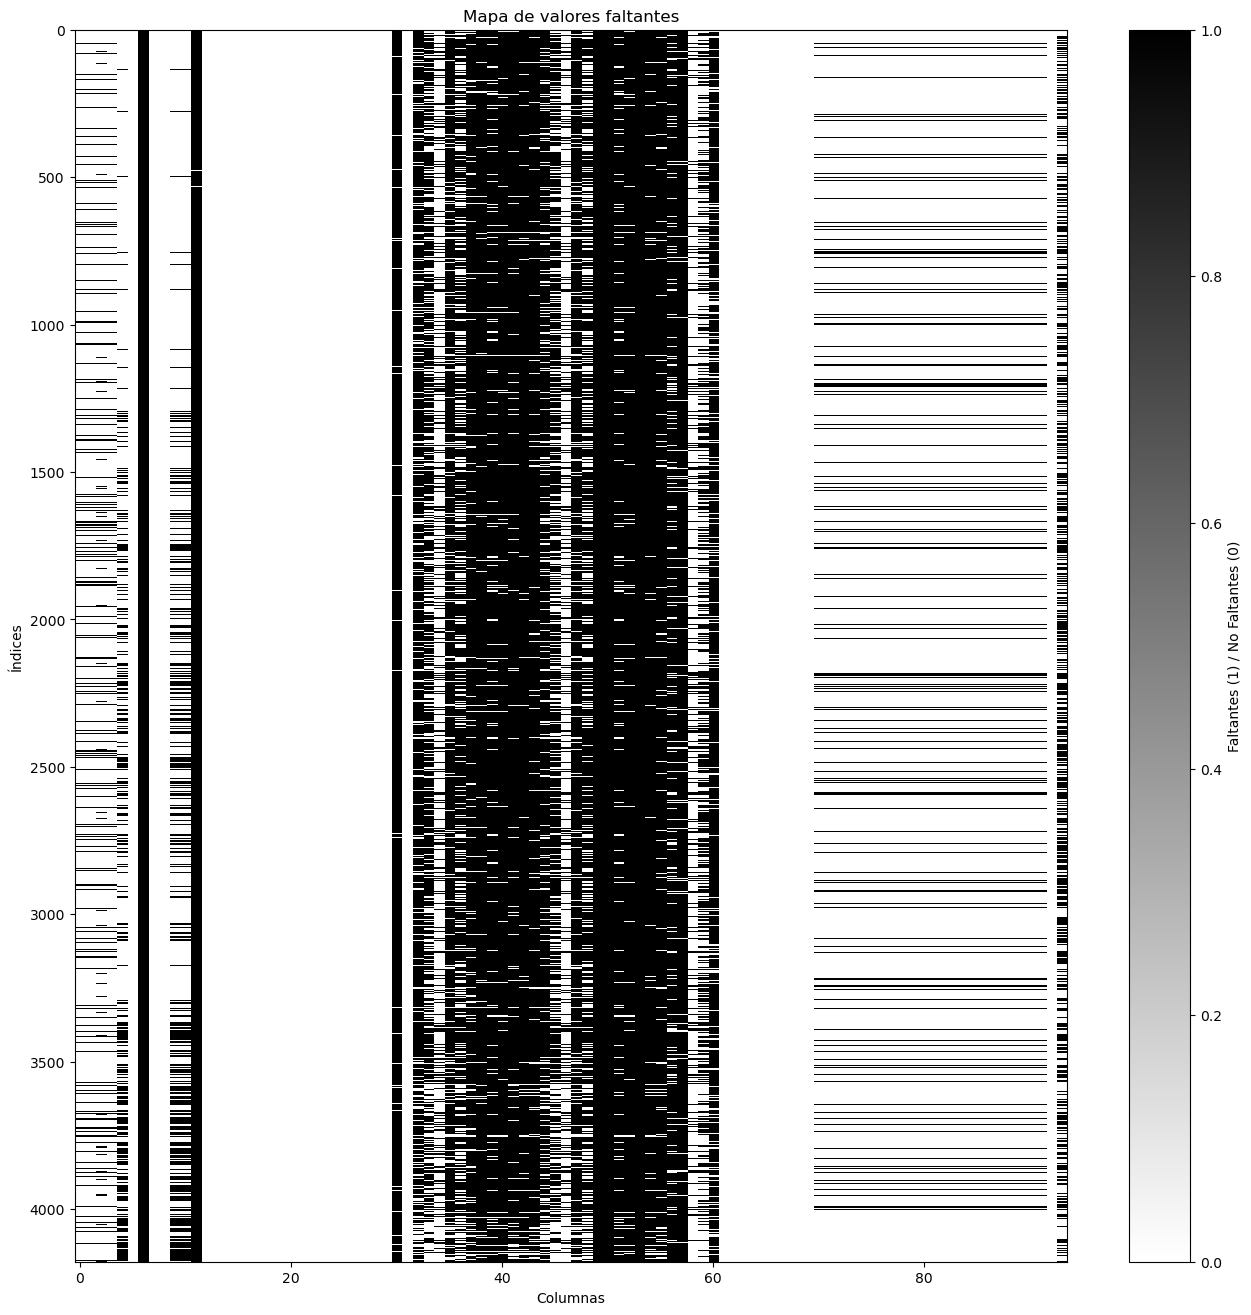

In [27]:
import matplotlib.pyplot as plt
missing_map = df2023_Col_sel.isnull()

# Dibujar el gráfico
plt.figure(figsize=(16, 16))
plt.imshow(missing_map, aspect='auto', cmap='binary', interpolation='none')
plt.colorbar(label='Faltantes (1) / No Faltantes (0)')
plt.xlabel("Columnas")
plt.ylabel("Índices")
plt.title("Mapa de valores faltantes")
plt.show()

In [33]:
# Corregir la longitud si está positiva
df2023_Col_sel['GPSLONG'] = df2023_Col_sel['GPSLONG'].apply(lambda x: x * -1 if x > 0 else x)


/var/folders/95/f31yxtf97vs9vtf2fgff4fbw0000gn/T/ipykernel_32951/2069134805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_Col_sel['GPSLONG'] = df2023_Col_sel['GPSLONG'].apply(lambda x: x * -1 if x > 0 else x)


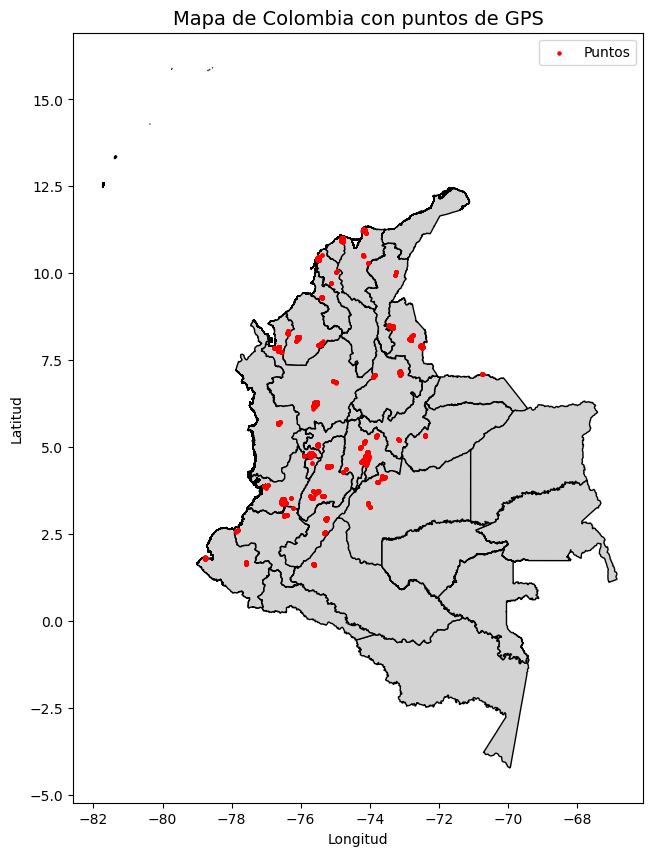

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar shapefile de Colombia (puedes reemplazar la ruta si tienes el archivo localmente)
shapefile_url = "Geografia Colombia/gadm41_COL_shp/gadm41_COL_1.shp"
colombia_map = gpd.read_file(shapefile_url)

# Crear un GeoDataFrame para los puntos del DataFrame `df2023_Col_sel`
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Crear geometrías de puntos a partir de las columnas GPSLONG y GPSLAT
geometry = [Point(xy) for xy in zip(df2023_Col_sel['GPSLONG'], df2023_Col_sel['GPSLAT'])]
points_gdf = GeoDataFrame(df2023_Col_sel, geometry=geometry, crs="EPSG:4326")  # CRS: WGS84

# Graficar el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Colombia
colombia_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Dibujar los puntos
points_gdf.plot(ax=ax, markersize=5, color='red', label='Puntos')

# Configurar el gráfico
plt.title("Mapa de Colombia con puntos de GPS", fontsize=14)
plt.legend()
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [28]:
selected_columns_2018 = [
    'LAT_1', 'LONG_1', 'SECTOR', 'SECCION', 'MANZANA',  # Geográficas
    'EDAD', 'RANGO_EDAD', 'DH', 'PA', 'PB', 'PB1',      # Sociodemográficas
    'ID', 'FECHAINI', 'FECHAFIN', 'DIREC_VIVI', 'ESTUDIO', 'ENTREVISTADOR',  # Administrativas
    # Bloque 4: Uso de internet
    'P7', 'P8', 'P10', 'P11',
    
    # Bloque 5: Equipamiento de la vivienda
    'P15', 'P16_1', 'P16_2', 'P16_3', 'P16_4', 'P16_5', 'P16_6', 'P16_7', 
    'P16_8', 'P16_9', 'P16_10', 'P16_11', 'P17', 'P19', 'P21',
    
    # Bloque 6: Conectividad del hogar
    'P27', 'P29',
    
    # Bloque 8: Percepciones sobre internet
    'P33', 'P34', 'P35', 'P36_1', 'P36_2', 'P36_3', 'P36_4',
    
    # Bloque 9: Comercio electrónico
    'P56', 'P57', 'P58', 'P59'
]
df2018_Col_sel = df2018[selected_columns_2018]
df2018_Col_sel

,LAT_1,LONG_1,SECTOR,SECCION,MANZANA,EDAD,RANGO_EDAD,DH,PA,PB,...,P34,P35,P36_1,P36_2,P36_3,P36_4,P56,P57,P58,P59
0,10.952493,-74.777018,2201,8,3,69,7,5,2,8001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,203,1,13,56,6,4,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203,1,13,64,6,0,1,5001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.299582,-75.550590,203,2,2,38,4,8,1,5001,...,1.0,2134.0,3.0,7.0,13.0,21.0,9.0,NaN,NaN,NaN
4,7.090175,-73.145032,798,2,25,43,4,8,5,68001,...,1.0,23.0,NaN,910.0,17.0,NaN,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,7.086000,-70.757413,0,0,0,18,2,4,5,81001,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3479,7.063045,-70.758203,0,0,0,36,4,6,5,81001,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3480,7.080648,-70.753662,0,0,0,18,2,8,5,81001,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3481,7.063063,-70.758190,2,7,8,29,3,9,5,81001,...,1.0,4.0,NaN,NaN,NaN,2322.0,NaN,NaN,NaN,NaN


In [47]:
# Corregir la longitud si está positiva
df2018_Col_sel['LONG_1'] = df2018_Col_sel['LONG_1'].apply(lambda x: x * -1 if x > 0 else x)
df2018_Col_sel=df2018_Col_sel[df2018_Col_sel['LAT_1']>-20]

/var/folders/95/f31yxtf97vs9vtf2fgff4fbw0000gn/T/ipykernel_32951/1805621950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2018_Col_sel['LONG_1'] = df2018_Col_sel['LONG_1'].apply(lambda x: x * -1 if x > 0 else x)


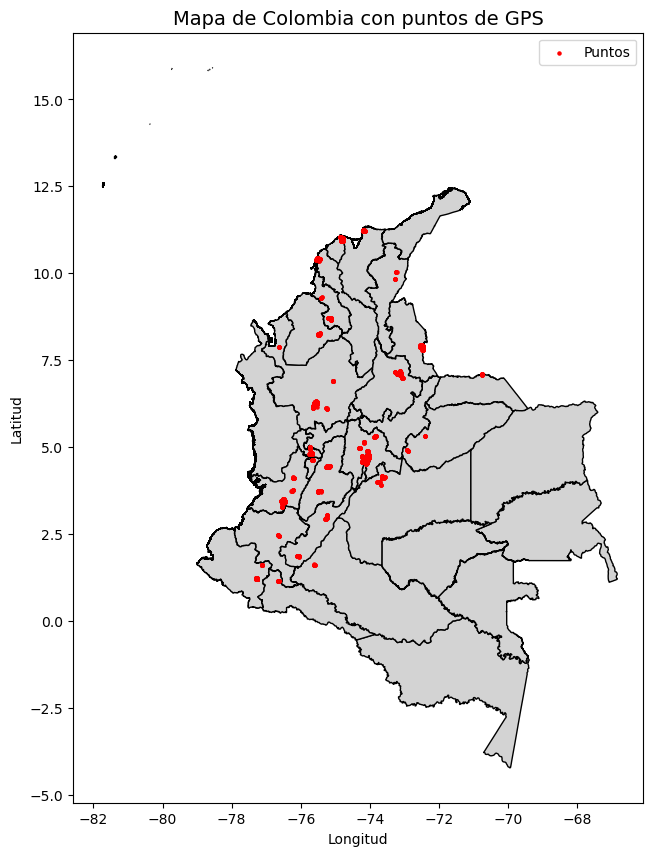

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar shapefile de Colombia (puedes reemplazar la ruta si tienes el archivo localmente)
shapefile_url = "Geografia Colombia/gadm41_COL_shp/gadm41_COL_1.shp"
colombia_map = gpd.read_file(shapefile_url)

# Crear un GeoDataFrame para los puntos del DataFrame `df2023_Col_sel`
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Crear geometrías de puntos a partir de las columnas GPSLONG y GPSLAT
geometry = [Point(xy) for xy in zip(df2018_Col_sel['LONG_1'], df2018_Col_sel['LAT_1'])]
points_gdf = GeoDataFrame(df2018_Col_sel, geometry=geometry, crs="EPSG:4326")  # CRS: WGS84

# Graficar el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de Colombia
colombia_map.plot(ax=ax, color='lightgrey', edgecolor='black')

# Dibujar los puntos
points_gdf.plot(ax=ax, markersize=5, color='red', label='Puntos')

# Configurar el gráfico
plt.title("Mapa de Colombia con puntos de GPS", fontsize=14)
plt.legend()
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


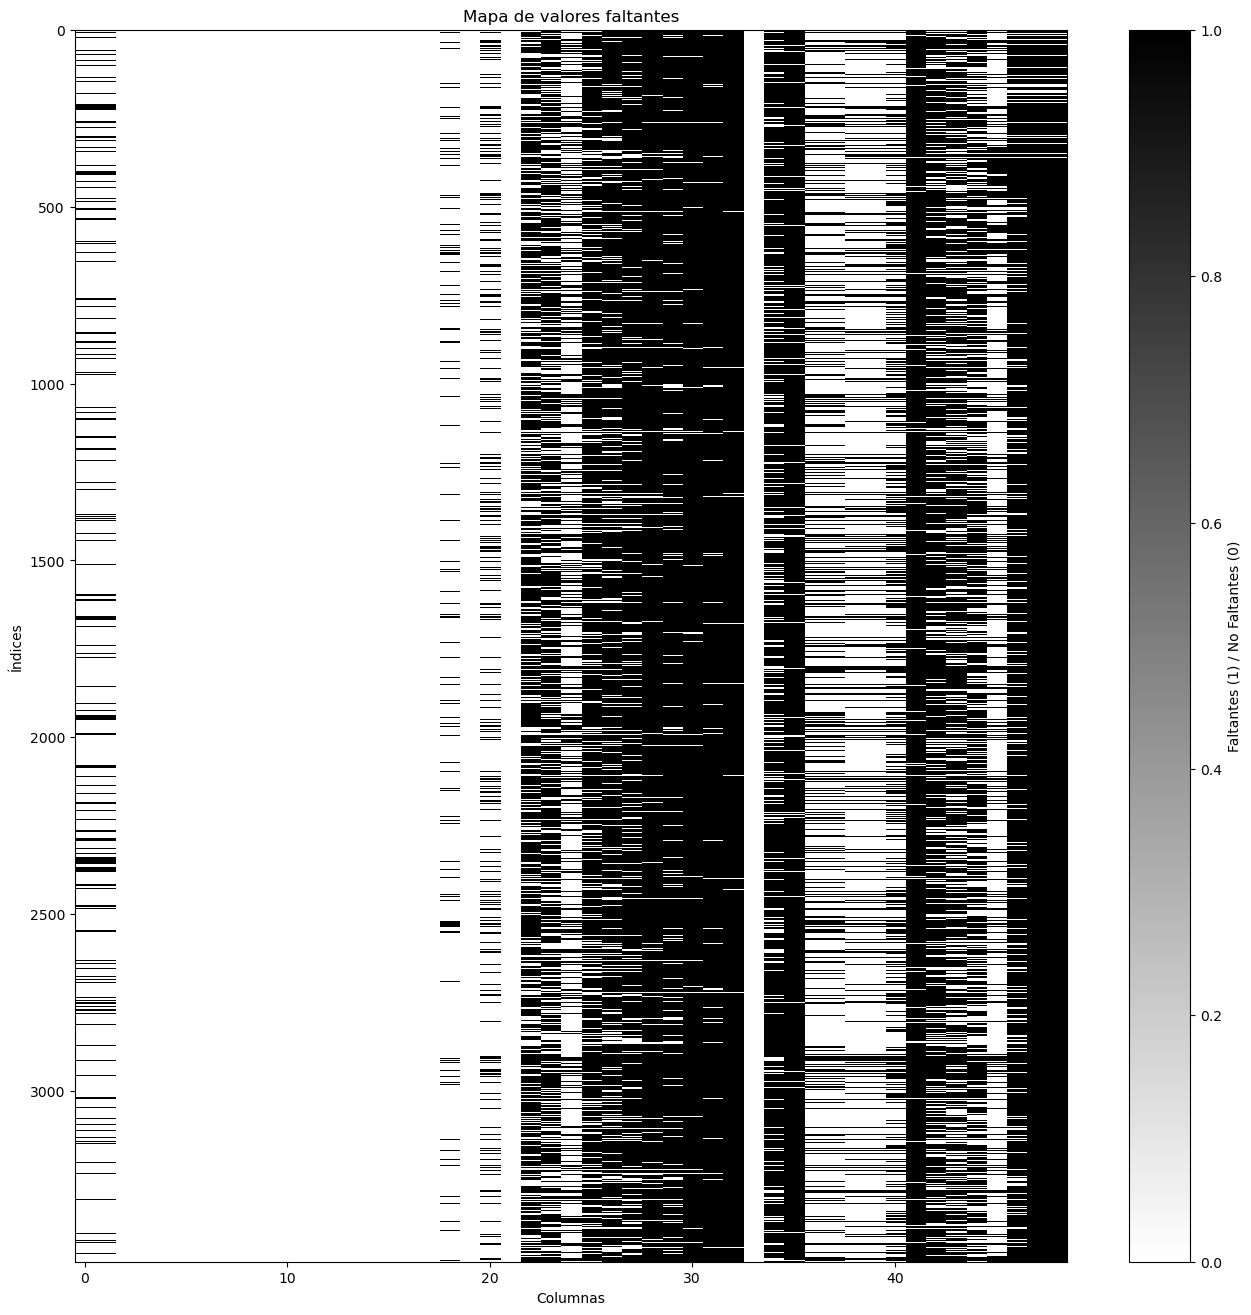

In [29]:
import matplotlib.pyplot as plt
missing_map = df2018_Col_sel.isnull()

# Dibujar el gráfico
plt.figure(figsize=(16, 16))
plt.imshow(missing_map, aspect='auto', cmap='binary', interpolation='none')
plt.colorbar(label='Faltantes (1) / No Faltantes (0)')
plt.xlabel("Columnas")
plt.ylabel("Índices")
plt.title("Mapa de valores faltantes")
plt.show()